<a href="https://colab.research.google.com/github/MridulaRPanicker/ICT_Python_Assignments/blob/main/Assignment_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ICT_DSA_Course_Programs/Data_toWork/Wine_clust.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
data.shape

(178, 13)

After going through the 'Wine' data, we can understand the following
- The dataset has 178 rows and 13 columns
- There are no missing values in the dataest.
- All the features are either float/int datatype. So no need of encoding.
- But the magnitude of feature "Proline" is very different from other features. This could impact the algorithm. So we will do scaling. But before that I'm going to train the model without scaling and see the result.

### **K-Means without scaling**

In [11]:
from sklearn.cluster import KMeans

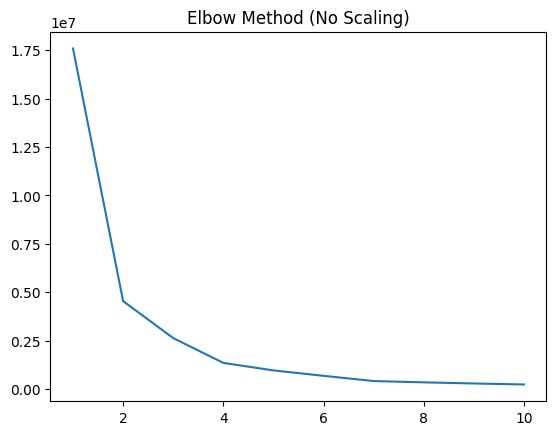

In [12]:

# data without scaling is used for training the model.
wcss_actual = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss_actual.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_actual)
plt.title('Elbow Method (No Scaling)')
plt.show()

The "Elbow method" without clustering is giving 2 clusters as answer.

Now need to try the impact of scaling on this data.

###**K-Means with scaling**

In [16]:
# Scaling the data - to minimize the effect of magnitude of a feature while training the algorithm

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled_array = scaler.fit_transform(data)

In [17]:
# converting the scaled array to DataFrame

data_scaled = pd.DataFrame(data_scaled_array,columns = data.columns)

In [18]:
data_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [19]:
data.shape

(178, 13)

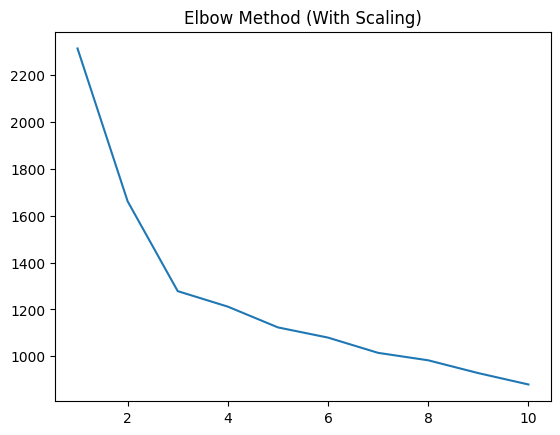

In [21]:
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  k_means.fit(data_scaled)
  wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method (With Scaling)')
plt.show()

The "Elbow method" with scaling is giving 3 clusters as answer.
More defined Elbow at 3 as well

Creating the model with Optimum clusters at 3

In [61]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(data_scaled)
data['KMeans_Cluster'] = y_kmeans

Now since the model created with optimum clusters, we can evaluate the clustering with the help of Silhouette Score. This gives an idea about how close a point is to its own cluster, and how far it is from other clusters.

In [26]:
from sklearn.metrics import silhouette_score

sil_scores = []

for i in range(2,8):
  k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  y_kmeans = k_means.fit_predict(data_scaled)
  s_score = silhouette_score(data_scaled,y_kmeans)
  sil_scores.append(s_score)

  print(f"Cluster = {i}, the average score is : {s_score:.4f}")

Cluster = 2, the average score is : 0.2650
Cluster = 3, the average score is : 0.2849
Cluster = 4, the average score is : 0.2542
Cluster = 5, the average score is : 0.1836
Cluster = 6, the average score is : 0.1690
Cluster = 7, the average score is : 0.1726


As per the Silhouette score peaks at k = 3. Eventhough the score still looks bad, taking any other cluster makes it even worse. So both Elbow method and Silhouette score confirms k=3

Follwing the plotting of Silhouette score, which shows the peaks visibly.

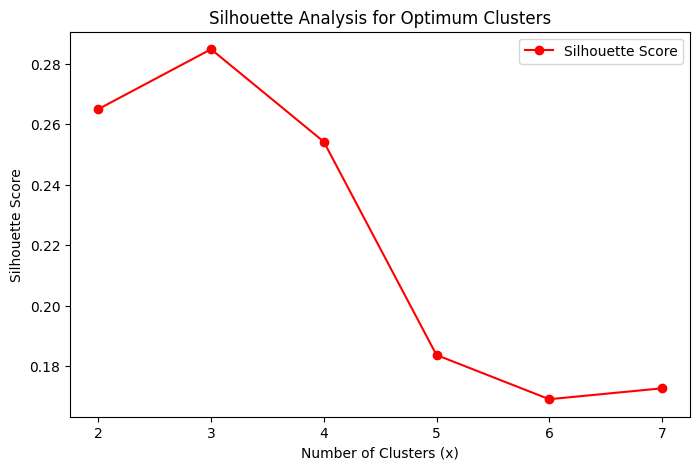

In [29]:
plt.figure(figsize=(8, 5))
x = range(2, 8)
plt.plot(x, sil_scores, marker='o', color='r', label='Silhouette Score')
plt.xlabel('Number of Clusters (x)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimum Clusters')
plt.legend()
plt.show()

###**Agglomerative Clustering**

Since the effect of scaling was evidant in K-Means algorithm, I will continue with scaled data for Agglomerative Clustering

In this case, first I will predict the Silhoutte score for different clusters using Agglomerative Clustering Algorithm. This helps to predict the number of clusters. Then drawing the dendrogram can confirm the result. This combines mathematical validation with visual confirmation.

In [62]:
from sklearn.cluster import AgglomerativeClustering

sil_scores_ac = []
for i in range(2,8):
  ahc = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'ward')
  y_ahc = ahc.fit_predict(data_scaled)
  data['HC_Cluster'] = y_ahc
  s_score_ac = silhouette_score(data_scaled,y_ahc)
  sil_scores_ac.append(s_score_ac)

  print(f"Cluster = {i}, the average score is : {s_score_ac:.4f}")

Cluster = 2, the average score is : 0.2670
Cluster = 3, the average score is : 0.2774
Cluster = 4, the average score is : 0.2258
Cluster = 5, the average score is : 0.1867
Cluster = 6, the average score is : 0.1797
Cluster = 7, the average score is : 0.1869


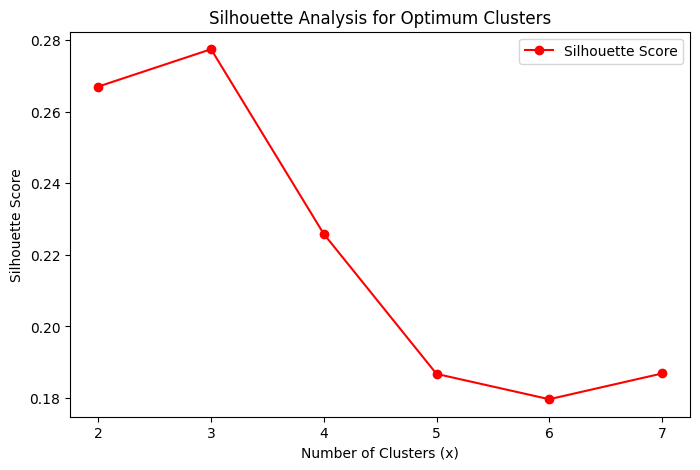

In [31]:
# Plotting the Silhouette score

plt.figure(figsize=(8, 5))
x = range(2, 8)
plt.plot(x, sil_scores_ac, marker='o', color='r', label='Silhouette Score')
plt.xlabel('Number of Clusters (x)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimum Clusters')
plt.legend()
plt.show()

For Agglomerative Clustering also, the Silhouette score is peaked at k = 3. Now to validate the same visually we need to draw a dendrogram

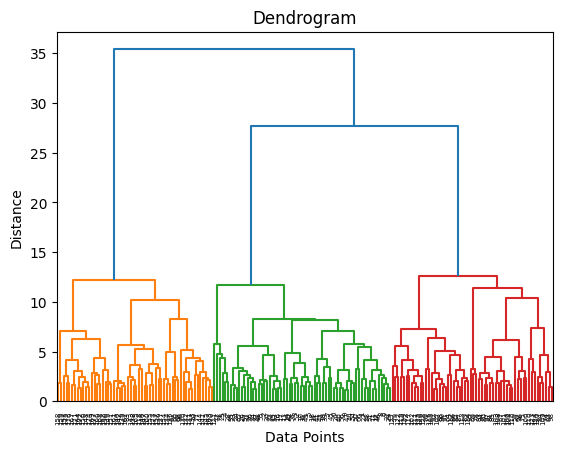

In [32]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data_scaled,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

The above dendrogram is providig the visual feeling of 3 clusters. But that also we can confirm with the help of below method. It depicts the dendrogram and the cut.

In [36]:
Z = sch.linkage(data_scaled, method='ward')
distances = Z[:, 2]
diffs = np.diff(distances)
idx = np.argmax(diffs)
cut_height = distances[idx]

In [70]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(Z, t=cut_height, criterion='distance')

n_clusters = len(np.unique(labels))
print(f"Number of Clusters:{n_clusters}")

Number of Clusters:3


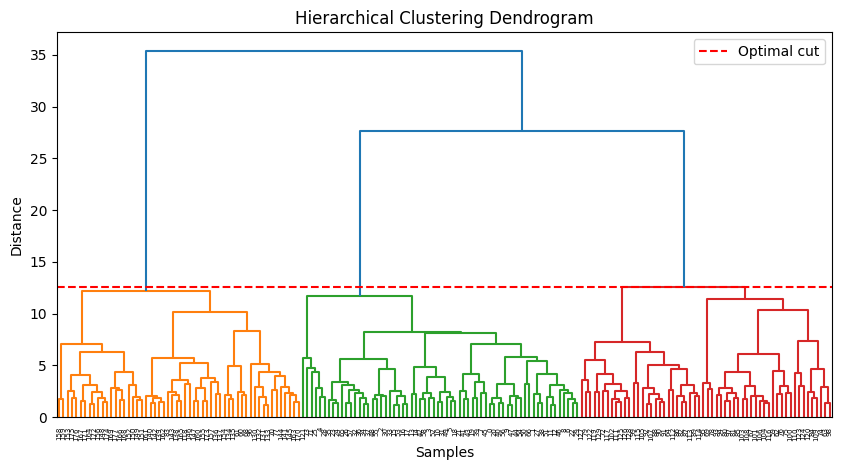

In [39]:
#  Build linkage matrix

Z = sch.linkage(data_scaled, method='ward')

#  Extract merge distances

distances = Z[:, 2]

#  Compute second derivative (acceleration)

acceleration = np.diff(distances, 2)

#  Locate maximum acceleration

idx = np.argmax(acceleration)

#  Compute optimal number of clusters

n_samples = data_scaled.shape[0]

optimal_k = n_samples - (idx + 2)

cut_height = distances[idx + 1]
#  Get cluster labels

labels = fcluster(Z, t=cut_height, criterion='distance')

#  Plot dendrogram with cut line

plt.figure(figsize=(10, 5))

sch.dendrogram(Z)

plt.axhline(y=cut_height, color='r', linestyle='--', label='Optimal cut')

plt.title("Hierarchical Clustering Dendrogram")

plt.xlabel("Samples")

plt.ylabel("Distance")

plt.legend()

plt.show()

This diagram provides visual validation of 3 clusters in our dataset.

###**DBSCAN**

DBSCAN is a powerful clustering method and this works based on density.

This identifies outliers are show them in the category of -1.

In DBSCAN we need eps(it is the radius of a cluster) and min_samples(shows the minimum points to form a cluster).

min_samples

There exists a general rule of thumb. As per that, the min_samples = 2 x no. of features. In this dataset min_samples becomes 26

Epsilon(eps)

The best eps is found at the elbow of a K-Distance graph. The calculation of that is as follows

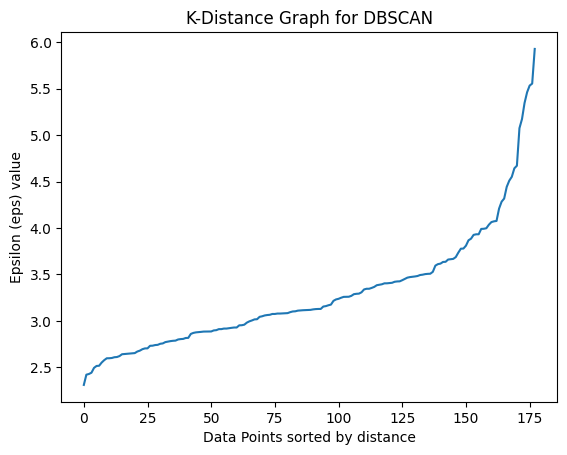

In [40]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

min_samples = 26
# We use k = min_samples
neighbors = NearestNeighbors(n_neighbors=26)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sort distances and plot
distances = np.sort(distances[:, 25], axis=0)
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (eps) value')
plt.show()

After understanding eps and min_samples need to run the model to see the performance

In [63]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 2.7, min_samples= 26)
y_dbs = dbs.fit_predict(data_scaled)
data['DBSCAN_Cluster'] = y_dbs

print(np.unique(y_dbs))

data_scaled_copy = data_scaled.copy()
data_scaled_copy['Clusters'] = y_dbs

n_clusters_db = len(set(data_scaled_copy['Clusters'])) - (1 if -1 in data_scaled_copy['Clusters'].values else 0)
print(f"Number of clusters found: {n_clusters_db}")

[-1  0  1]
Number of clusters found: 2


In [55]:
if n_clusters_db > 1:
    score = silhouette_score(data_scaled, data_scaled_copy['Clusters'])
    print(f"DBSCAN Silhouette Score: {score:.4f}")

DBSCAN Silhouette Score: 0.1527


By trying multiple options, DBSCAN is not converging to 3 clusters like K-Means & Agglomeratiove.

In [67]:
comparison_data = pd.DataFrame({
    'K-Means': data['KMeans_Cluster'],
    'Hierarchical': data['HC_Cluster'],
    'DBSCAN': data['DBSCAN_Cluster']
})


#### Verdict

- For the wine dataset availabe K-Means and Agglomerative algorithms help to reach 3 clusters based on Silhoutte score and visual representation. DBSCAN is not converging to a satisfactory result. Hence not considering DBSCAN for clustering.

In the dataset there are 13 features and it is not possible to visually plot the clusters with these many features.

#### PCA - Principal Component Analysis

- This helps to reduce the number of features to 2 dimension and then plot the graph to show the clusters.

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca.fit(data_scaled)
x_pca = pca.transform(data_scaled)


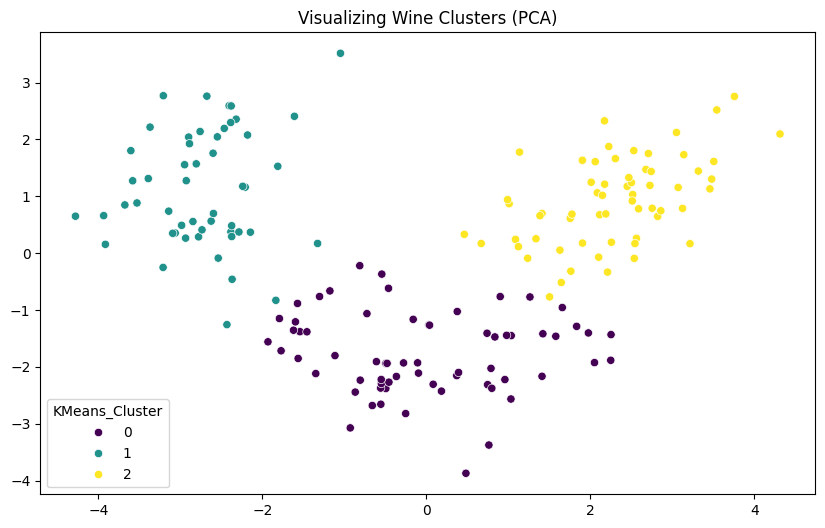

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('Visualizing Wine Clusters (PCA)')
plt.show()

After PCA, by using a scatter plot we can see all the three clusters from the dataset.